In [ ]:
!pip install quantdsl

Compiled 79 nodes 
Compilation in 0.496s
Simulation in 0.135s
Starting 1267 node evaluations, please wait...
1267/1267 100.00% complete 66.80 eval/s running 20s eta 0s     
Evaluation in 18.969s


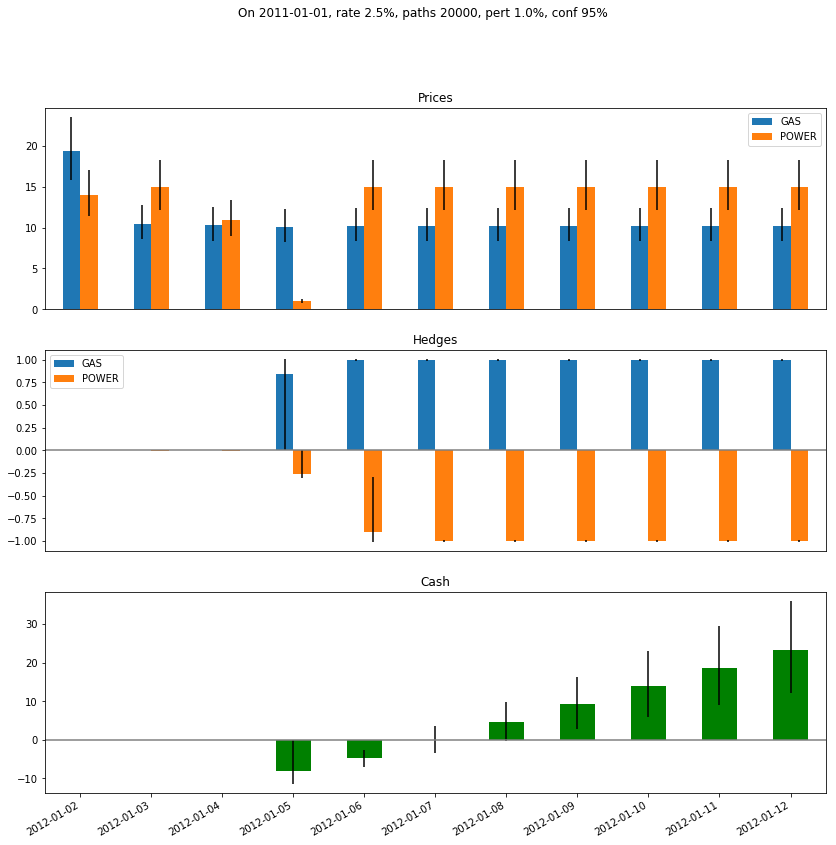

In [4]:
from quantdsl import calc

contract_model = """
from quantdsl.lib.powerplant2 import PowerPlant, Hot, Cold
        
PowerPlant(Date('2012-1-1'), Date('2012-1-12'), Cold())
"""

market_model = {
    'name': 'quantdsl.priceprocess.blackscholes.BlackScholesPriceProcess',
    'market': ['GAS', 'POWER'],
    'sigma': [0.1, 0.1],
    'rho': [[1.0, 0.8], [0.8, 1.0]],
    'curve': {
        'GAS': [
            ('2011-1-1', 1),
            ('2012-1-1', 13.5),
            ('2012-1-2', 19.4),
            ('2012-1-3', 10.5),
            ('2012-1-4', 10.3),
            ('2012-1-5', 10.1),
            ('2012-1-6', 10.2),
        ],
        'POWER': [
            ('2011-1-1', 11),
            ('2012-1-1', 15.5),
            ('2012-1-2', 14.0),
            ('2012-1-3', 15.0),
            ('2012-1-4', 11.0),
            ('2012-1-5', 1.0),
            ('2012-1-6', 15.0),
        ]
    }
}


In [ ]:
results = calc(contract_model,
    price_process=market_model,
    observation_date='2011-1-1',
    interest_rate=2.5,
    periodisation='daily',
    verbose=True
)

In [ ]:
results.plot(
    confidence_interval=95,
    figsize=(10, 10)
)
